<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Log%C3%ADstica%20II/Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Código para leer archivos
from google.colab import files
uploaded=files.upload()

Saving Distancias Normalización (1).xlsx to Distancias Normalización (1).xlsx


In [ ]:
NombreDocumento='data 2 eslabones diapos.xlsx'
plantas=pd.read_excel(NombreDocumento,sheet_name='plantas',index_col=0)
cedis=pd.read_excel(NombreDocumento,sheet_name='cedis',index_col=0)
clientes=pd.read_excel(NombreDocumento,sheet_name='clientes',index_col=0)
cir=pd.read_excel(NombreDocumento,sheet_name='cir',index_col=0)
crj=pd.read_excel(NombreDocumento,sheet_name='crj',index_col=0)

Leer archivo de ciudades y calcular distancias

In [ ]:
#Código para leer archivos
from google.colab import files
uploaded=files.upload()

Saving Distancias Ponderadas.xlsx to Distancias Ponderadas.xlsx


In [ ]:
NombreDocumento='Ciudades de Colombia 1.xlsx'
Ciudades=pd.read_excel(NombreDocumento,sheet_name='Sheet1',index_col=0)
Ciudades.dropna(inplace=True)

In [ ]:
Ciudades

,Ciudad,Longitud,Latitud,Población,Departamento,Porcentaje de viejitos,Cantidad de viejitos
0,BOGOTA D.C.,-74.08175,4.60971,7743955,Bogota D.C.,0.137,1060922
1,SANTA ROSA DE CABAL,-75.62139,4.86806,73231,Risaralda,0.178,13035
2,NECOCLI,-76.78926,8.42627,70824,Antioquia,0.145,10269
3,CIENAGA DE ORO,-75.62028,8.87443,70326,Cordoba,0.128,9002
4,CHIQUINQUIRA,-73.81748,5.61637,70127,Boyaca,0.165,11571
...,...,...,...,...,...,...,...
195,CAJIBIO,-76.57039,2.62271,38932,Cauca,0.132,5139
196,SAMPUES,-75.38167,9.18361,38631,Sucre,0.126,4868
197,SABANAGRANDE,-74.76059,10.79115,35044,Atlantico,0.122,4275
198,VILLANUEVA,-71.96667,5.28333,31727,Bolivar,0.119,3776


In [ ]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        ("ñ", "n"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [ ]:
Ciudades.index

Index(['BOGOTA D.C.', 'SANTA ROSA DE CABAL', 'NECOCLÍ', 'CIÉNAGA DE ORO',
       'CHIQUINQUIRÁ', 'SAN JOSÉ DEL GUAVIARE', 'PLANETA RICA', 'GRANADA',
       'LA PLATA', 'LA ESTRELLA',
       ...
       'TÚQUERRES', 'ABREGO', 'VILLA DE SAN DIEGO DE UBATE', 'LÍBANO',
       'DIBULLA', 'CAJIBÍO', 'SAMPUÉS', 'SABANAGRANDE', 'VILLANUEVA',
       'LA MESA'],
      dtype='object', name='Ciudad', length=200)

In [ ]:
Ciudades.index

Index(['BOGOTÁ', 'SANTA ROSA DE CABAL', 'NECOCLÍ', 'CIÉNAGA DE ORO',
       'CHIQUINQUIRÁ', 'SAN JOSÉ DEL GUAVIARE', 'PLANETA RICA', 'GRANADA',
       'LA PLATA', 'LA ESTRELLA',
       ...
       'TÚQUERRES', 'ABREGO', 'VILLA DE SAN DIEGO DE UBATE', 'LÍBANO',
       'DIBULLA', 'CAJIBÍO', 'SAMPUÉS', 'SABANAGRANDE', 'VILLANUEVA',
       'LA MESA'],
      dtype='object', name='Ciudad', length=200)

In [ ]:
Lista=[]
for i in range(0,len(Ciudades.index)):
  Lista.append(normalize(Ciudades['Departamento'].iloc[i]))

In [ ]:
Ciudades['Departamento']=Lista

In [ ]:
Ciudades.to_excel('Ciudades de Colombia 1.xlsx')

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [ ]:
n=Ciudades.shape[0]
Matriz=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    lat1, lon1, lat2, lon2=Ciudades['Latitud'].iloc[i],Ciudades['Longitud'].iloc[i],Ciudades['Latitud'].iloc[j],Ciudades['Longitud'].iloc[j]
    distancia=haversine(lat1, lon1, lat2, lon2)
    Matriz[i][j]=distancia
Distancias=pd.DataFrame(Matriz)
Distancias.to_csv('Distancias.csv')

In [ ]:
PoblacionCiudades=Ciudades['Cantidad de viejitos']

In [ ]:
Distancias=pd.DataFrame(np.round(Matriz,2))
Distancias.to_csv('Distancias.csv')

In [ ]:
PoblacionCiudades

0      1060922
1        13035
2        10269
3         9002
4        11571
        ...   
195       5139
196       4868
197       4275
198       3776
199       4288
Name: Cantidad de viejitos, Length: 200, dtype: int64

In [ ]:
PoblacionCiudades.to_csv('Demanda.csv')

In [ ]:
NombreDocumento='Departamentos_y_municipios_de_Colombia.csv'
DepartamentosYCiudades=pd.read_csv(NombreDocumento)
#Ciudades.dropna(inplace=True)

In [ ]:
DepartamentosYCiudades=DepartamentosYCiudades[['DEPARTAMENTO','MUNICIPIO']]

In [ ]:
DepartamentosYCiudades.set_index('MUNICIPIO',inplace=True)

In [ ]:
Lista=[]
for i in range(0,len(DepartamentosYCiudades.index)):
  Lista.append(normalize(DepartamentosYCiudades.index[i]).upper())

In [ ]:
DepartamentosYCiudades.index=Lista

In [ ]:
DepartamentosYCiudades.loc['BOGOTA D.C.']

DEPARTAMENTO    Bogotá D.C.
Name: BOGOTA D.C., dtype: object

In [ ]:
#Ciudades['Departamento'].loc[i]
Lista1=[]
for i in Ciudades.index:
  Lista1.append(DepartamentosYCiudades['DEPARTAMENTO'].loc[i])

In [ ]:
DepartamentosYCiudades.to_excel('DepartamentosYCiudades.xlsx')

In [ ]:
NombreDocumento='Distancias Ponderadas.xlsx'
DistanciasPonderadas=pd.read_excel(NombreDocumento,sheet_name='Hoja1',index_col=0)

In [ ]:
Lista=[]
for j in range(0,len(DistanciasPonderadas.index)):
  texto='Fila '+DistanciasPonderadas.index[j]
  Lista.append(texto)

In [ ]:
DistanciasPonderadas.index=Lista

In [ ]:
Iteraciones=DistanciasPonderadas.copy()
Iteraciones['Suma']=np.sum(Iteraciones)

In [ ]:
for i in Iteraciones.index:
  Iteraciones['Suma'].loc[str(i)]=np.sum(Iteraciones.loc[str(i)])

In [ ]:
Minimo=Iteraciones.iloc[np.argmin(Iteraciones['Suma'])]

In [ ]:
Minimo

BOGOTA                 9.451457e+07
SANTA ROSA DE CABAL    1.380018e+06
NECOCLI                4.456712e+06
CIENAGA DE ORO         3.867507e+06
CHIQUINQUIRA           1.298383e+06
                           ...     
SAMPUES                2.229815e+06
SABANAGRANDE           2.696157e+06
VILLANUEVA             1.145406e+06
LA MESA                3.786317e+05
Suma                   1.350044e+09
Name: Fila LA UNION, Length: 201, dtype: float64

In [ ]:
Itera=Iteraciones
for j in Iteraciones.index:
  for i in Iteraciones:
    Itera[i].loc[j]=np.min([Minimo[i],Iteraciones[i].loc[j]])
  Itera['Suma'].loc[str(j)]=np.sum(Itera.loc[str(j)])
Minimo=Itera.iloc[np.argmin(Itera['Suma'])]

In [ ]:
Minimo=Itera.iloc[np.argmin(Itera['Suma'])].copy()

In [ ]:
Minimo

BOGOTA                 0.000000e+00
SANTA ROSA DE CABAL    0.000000e+00
NECOCLI                0.000000e+00
CIENAGA DE ORO         0.000000e+00
CHIQUINQUIRA           0.000000e+00
                           ...     
SAMPUES                8.696064e+04
SABANAGRANDE           6.054948e+04
VILLANUEVA             7.863474e+05
LA MESA                1.000000e+00
Suma                   8.084376e+09
Name: Fila SOLEDAD, Length: 201, dtype: float64

In [ ]:
Cantidad=30
ListaLugares=np.zeros(Cantidad)
Itera=Iteraciones.copy()
for j in Iteraciones.index:
  Itera['Suma'].loc[str(j)]=np.sum(Itera.loc[str(j)])
ListaLugares[0]=np.argmin(Itera['Suma'])
Minimo=Itera.iloc[int(ListaLugares[0])].copy()
for z in range(1,Cantidad):
  Itera=Iteraciones.copy()
  for j in Iteraciones.index:
    for i in Iteraciones:
      Itera[i].loc[j]=np.min([Minimo[i],Iteraciones[i].loc[j]])
    Itera['Suma'].loc[str(j)]=np.sum(Itera.loc[str(j)])
  ListaLugares[z]=np.argmin(Itera['Suma'])
  Minimo=Itera.iloc[int(ListaLugares[z])].copy()

ListaLugares

array([187.,  14., 101.,   0., 100.,  41.,  44.,  24., 111., 110., 189.,
        25., 108., 104.,   8.,  47.,  52., 114.,  40.,  23.,  67., 109.,
        37.,  68., 107.,  36.,  49.,  38.,  42., 105.])

array([187.,  14.,   8.,   0.,   9.,   1., 101.,  41.,  18.,   3.,  24.,
        21.,   4.,   2.,  20.,   6.,  15.,   7.,  22.,  11.,  16.,  13.,
        25.,  23.,  19.,  40.,  37.,  36.,  47.,  44.])

In [ ]:
Itera

,BOGOTA,SANTA ROSA DE CABAL,NECOCLI,CIENAGA DE ORO,CHIQUINQUIRA,SAN JOSE DEL GUAVIARE,PLANETA RICA,GRANADA,LA PLATA,LA ESTRELLA,RIOSUCIO,COROZAL,PUERTO ASIS,CAREPA,PLATO,ZONA BANANERA,VILLAMARIA,SAN MARCOS,BARANOA,GIRARDOTA,PAMPLONA,VALLEDUPAR,RIOACHA,VILLAVICENCIO,PASTO,CUCUTA,RAMIRIQUI,GACHETA,JENESANO,CHOCONTA,CAJICA,VILLA DE LEYVA,BOYACA,BELLO,PACHO,PALMIRA,NEIVA,POPAYAN,BUENAVENTURA,FLORENCIA,...,MOCOA,PUERTO TEJADA,SAN GIL,SAN PELAYO,ARBOLETES,MOMPOS,BOLIVAR,AGUAZUL,EL CHARCO,SEVILLA,ARAUQUITA,MIRANDA,CACERES,LETICIA,LEBRIJA,SEGOVIA,PUEBLO NUEVO,TUCHIN (1),BARBACOAS,MONTENEGRO,SIBATE,ARACATACA,GUADUAS,ALTO BAUDO,CUMARIBO,CUMBAL,LA UNION,BOSCONIA,SAN JUAN DEL CESAR,TUQUERRES,ABREGO,VILLA DE SAN DIEGO DE UBATE,LIBANO,DIBULLA,CAJIBIO,SAMPUES,SABANAGRANDE,VILLANUEVA,LA MESA,Suma
Fila BOGOTA,0.0,133972.022325,647439.288972,287744.219657,585402.757114,1.210008e+06,442832.950365,613226.559431,0.0,104333.146996,541623.593178,94023.867374,722186.608214,790134.49415,0.0,452886.048672,30098.132356,575662.023675,159729.635385,194402.679817,416856.748215,2.040286e+06,797531.672734,0.0,0.0,0.0,25515.526316,81045.394097,21028.160394,189251.823804,265716.218391,57519.42275,6709.556231,1.074440e+06,214215.620788,1.353772e+06,0.0,0.0,0.0,1.548978e+06,...,314483.071035,147106.162457,421369.816456,140249.705132,404544.902971,393828.01836,73364.069256,388362.994702,669356.347293,245314.388236,142841.276807,213886.687517,302544.622212,3.186278e+06,67805.473565,710088.724141,208531.031859,117193.004510,439051.755763,226850.721676,133286.533778,332510.034023,73665.576032,623186.58881,779324.866102,384107.867653,0.0,383124.044692,0.0,226386.616847,384669.579872,296047.780234,311068.012076,190483.602103,108238.679515,66137.705067,60549.476618,595311.445248,290408.684228,8.130519e+07
Fila SANTA ROSA DE CABAL,0.0,0.000000,647439.288972,287744.219657,585402.757114,1.210008e+06,442832.950365,613226.559431,0.0,104333.146996,541623.593178,94023.867374,722186.608214,790134.49415,0.0,452886.048672,30098.132356,575662.023675,159729.635385,194402.679817,416856.748215,2.040286e+06,797531.672734,0.0,0.0,0.0,25515.526316,81045.394097,21028.160394,189251.823804,265716.218391,57519.42275,6709.556231,1.074440e+06,214215.620788,1.353772e+06,0.0,0.0,0.0,1.548978e+06,...,314483.071035,147106.162457,421369.816456,140249.705132,404544.902971,393828.01836,73364.069256,388362.994702,669356.347293,245314.388236,142841.276807,213886.687517,302544.622212,3.186278e+06,67805.473565,710088.724141,208531.031859,117193.004510,439051.755763,226850.721676,133286.533778,332510.034023,73665.576032,623186.58881,779324.866102,384107.867653,0.0,383124.044692,0.0,226386.616847,384669.579872,296047.780234,311068.012076,190483.602103,108238.679515,66137.705067,60549.476618,595311.445248,290408.684228,8.116489e+07
Fila NECOCLI,0.0,133972.022325,0.000000,287744.219657,585402.757114,1.210008e+06,442832.950365,613226.559431,0.0,104333.146996,541623.593178,94023.867374,722186.608214,790134.49415,0.0,452886.048672,30098.132356,575662.023675,159729.635385,194402.679817,416856.748215,2.040286e+06,797531.672734,0.0,0.0,0.0,25515.526316,81045.394097,21028.160394,189251.823804,265716.218391,57519.42275,6709.556231,1.074440e+06,214215.620788,1.353772e+06,0.0,0.0,0.0,1.548978e+06,...,314483.071035,147106.162457,421369.816456,140249.705132,404544.902971,393828.01836,73364.069256,388362.994702,669356.347293,245314.388236,142841.276807,213886.687517,302544.622212,3.186278e+06,67805.473565,710088.724141,208531.031859,117193.004510,439051.755763,226850.721676,133286.533778,332510.034023,73665.576032,623186.58881,779324.866102,384107.867653,0.0,383124.044692,0.0,226386.616847,384669.579872,296047.780234,311068.012076,190483.602103,108238.679515,66137.705067,60549.476618,595311.445248,290408.684228,8.065775e+07
Fila CIENAGA DE ORO,0.0,133972.022325,647439.288972,0.000000,585402.757114,1.210008e+06,442832.950365,613226.559431,0.0,104333.146996,541623.593178,94023.867374,722186.608214,790134.49415,0.0,452886

In [ ]:
Itera['LA MESA'].loc['Fila SOLEDAD']=20

20.0

In [ ]:
Minimo

BOGOTA                 0.000000e+00
SANTA ROSA DE CABAL    1.339720e+05
NECOCLI                6.474393e+05
CIENAGA DE ORO         2.877442e+05
CHIQUINQUIRA           5.854028e+05
                           ...     
SAMPUES                6.613771e+04
SABANAGRANDE           6.054948e+04
VILLANUEVA             5.953114e+05
LA MESA                2.904087e+05
Suma                   7.805331e+07
Name: Fila BARRANCABERMEJA, Length: 201, dtype: float64

In [ ]:
Itera.to_excel('Distancias Ponderadas con 30 PVS.xlsx')

In [ ]:
pd.DataFrame(NombresLugares).to_excel('Lista de lugares a poner.xlsx')

In [ ]:
NombresLugares=[]
for f in range(0,len(ListaLugares)):
  NombresLugares.append(Iteraciones.columns[int(ListaLugares[f])])
NombresLugares

['LA UNION',
 'PLATO',
 'CALI',
 'BOGOTA',
 'MEDELLIN',
 'BUCARAMANGA',
 'SOLEDAD',
 'PASTO',
 'PEREIRA',
 'MONTERIA',
 'SAN JUAN DEL CESAR',
 'CUCUTA',
 'CARTAGENA DE INDIAS',
 'TUNJA',
 'LA PLATA',
 'FLORIDABLANCA',
 'APARTADO',
 'IBAGUE',
 'TUMACO ',
 'VILLAVICENCIO',
 'CAUCASIA',
 'SINCELEJO',
 'POPAYAN ',
 'MANAURE',
 'SANTA MARTA ',
 'NEIVA ',
 'TULUA',
 'BUENAVENTURA ',
 'MANIZALES',
 'BARRANCABERMEJA']

In [ ]:
Distancias=pd.read_excel('Distancias.xlsx',index_col=0)

In [ ]:
DistanciasSeleccionadas=pd.DataFrame(columns=Distancias.columns)
for k in NombresLugares:
  DistanciasSeleccionadas.loc[k]=Distancias.loc[k]

In [ ]:
DistanciasSeleccionadas.to_excel('Distancias Nuevas.xlsx')

In [ ]:
DistanciasSeleccionadas

,BOGOTA,SANTA ROSA DE CABAL,NECOCLI,CIENAGA DE ORO,CHIQUINQUIRA,SAN JOSE DEL GUAVIARE,PLANETA RICA,GRANADA,LA PLATA,LA ESTRELLA,RIOSUCIO,COROZAL,PUERTO ASIS,CAREPA,PLATO,ZONA BANANERA,VILLAMARIA,SAN MARCOS,BARANOA,GIRARDOTA,PAMPLONA,VALLEDUPAR,RIOACHA,VILLAVICENCIO,PASTO,CUCUTA,RAMIRIQUI,GACHETA,JENESANO,CHOCONTA,CAJICA,VILLA DE LEYVA,BOYACA,BELLO,PACHO,PALMIRA,NEIVA,POPAYAN,BUENAVENTURA,FLORENCIA,...,PIENDAMO,MOCOA,PUERTO TEJADA,SAN GIL,SAN PELAYO,ARBOLETES,MOMPOS,BOLIVAR,AGUAZUL,EL CHARCO,SEVILLA,ARAUQUITA,MIRANDA,CACERES,LETICIA,LEBRIJA,SEGOVIA,PUEBLO NUEVO,TUCHIN (1),BARBACOAS,MONTENEGRO,SIBATE,ARACATACA,GUADUAS,ALTO BAUDO,CUMARIBO,CUMBAL,LA UNION,BOSCONIA,SAN JUAN DEL CESAR,TUQUERRES,ABREGO,VILLA DE SAN DIEGO DE UBATE,LIBANO,DIBULLA,CAJIBIO,SAMPUES,SABANAGRANDE,VILLANUEVA,LA MESA
LA UNION,89.087199,105.870201,433.996658,429.627475,112.210103,363.746904,378.784422,206.946455,330.987668,155.502439,115.988714,471.405263,550.789792,531.478832,519.402111,618.000899,90.618144,396.397473,631.419385,162.434944,338.176460,615.174429,741.153890,161.340841,520.592458,392.176211,154.323750,122.584397,150.938351,112.422348,77.830296,142.168699,152.713854,165.239450,59.897715,250.140759,252.407403,366.216219,293.002042,402.809434,...,342.720563,491.721069,283.624048,235.663708,444.820146,456.483207,459.325678,102.190424,238.603373,479.057838,166.409260,419.531627,268.232363,282.791551,1165.352230,275.620698,217.860052,348.179171,461.901647,541.307234,131.796946,85.391092,611.065495,13.140488,257.671265,548.430830,580.822206,0.000000,546.807686,655.610501,553.532309,367.527774,100.190176,45.832918,701.101242,346.825702,458.055621,630.680033,303.338351,88.300304
PLATO,581.377437,555.243957,267.562076,137.232658,476.271826,836.765642,176.886202,704.582262,831.821093,415.011463,496.393076,76.770327,1050.008578,1025.659340,0.000000,117.191083,533.870036,131.350065,112.606158,386.621243,356.693820,183.402422,282.976288,641.056012,993.179600,327.077039,513.680628,567.245166,514.291701,530.671216,548.213138,482.613792,507.095244,393.439132,522.566486,715.259727,765.336245,842.399201,702.672229,913.927059,...,818.510337,982.717675,751.546047,402.446760,148.111854,208.577083,72.408167,607.971970,569.652545,892.448591,627.568209,480.114198,744.487491,253.511014,1647.601862,343.934164,301.603273,173.388279,108.103410,976.349709,590.779329,592.176388,110.255527,525.769192,533.106727,809.750243,1042.438289,519.402111,100.032388,223.199499,1017.657423,256.143091,509.664749,542.382816,230.510332,821.338992,94.206656,111.347596,589.610323,512.117240
CALI,301.128919,189.295095,557.445989,614.609885,386.535696,440.594143,564.569983,312.678638,133.967301,319.482629,240.213012,669.757882,324.396426,296.568917,733.909158,845.118219,212.310372,602.617121,838.883739,349.560734,614.191153,862.192604,987.301627,331.015050,259.723238,666.786772,416.148338,355.664606,412.627577,368.212154,322.755002,413.412122,416.790465,341.396435,323.701464,27.416509,148.133725,109.857570,76.249272,225.220922,...,87.030587,252.766784,24.115764,512.237778,620.458694,603.928169,687.478393,180.058337,481.818329,205.297239,114.309637,692.142908,37.392778,480.459814,1120.855177,549.865921,454.163035,563.227251,650.044441,265.067061,153.301072,277.667815,837.941174,281.254376,239.828013,754.482717,313.157997,276.574993,784.305777,904.840962,286.965609,633.903522,366.139034,232.395653,942.243127,89.027945,653.128096,842.358408,545.826778,354.265484
BOGOTA,0.000000,173.065060,519.314490,503.858183,115.731260,276.997752,454.311296,125.383497,318.066437,244.005679,201.074321,540.539547,529.471967,514.821581,581.377437,672.160041,166.057087,465.057808,693.982895,248.126891,346.115511,657.427935,782.079742,72.482565,518.605129,404.612219,120.699961,54.539296,117.367218,73.934149,34.866319,129.597128,123.138451,252.260739,58.818128,273.740183,229.689985,370.541664,337.064387,373.704665,...,349.169804,478.891214,301.063814,240.797803,521.037277,538.111855,516.630466,125.825113,181.241580,506

In [ ]:
DistanciasSeleccionadas1=DistanciasSeleccionadas.copy()
DistanciasSeleccionadas1.set_axis(range(1,31),inplace=True)
DistanciasSeleccionadas1.set_axis(range(1,201),axis=1,inplace=True)

In [ ]:
DistanciasSeleccionadas1=np.round(DistanciasSeleccionadas1,2)
DistanciasSeleccionadas1.to_csv('Distancias Nuevas.csv')

In [ ]:
Distancias=pd.read_csv('Distancias (2).csv', index_col=0)
Distancias.set_axis(range(1,201),inplace=True)
Distancias.set_axis(range(1,201),axis=1,inplace=True)
Distancias.to_csv('Distancias Completas.csv')

In [ ]:
DistanciasIn=pd.read_csv('Distancias inserción.csv',sep=';', index_col=0)
DistanciasIn

,0,1,2,3,4,5
0,0,16,11,22,28,45
1,16,0,23,20,26,43
2,11,23,0,21,17,34
3,22,20,21,0,16,23
4,28,26,17,16,0,17
5,45,43,34,23,17,0


In [ ]:
#Función para mostrar estado de la lista
def mostrarLista(lista, lon):
	listaordenada=""
	for i in range(0,lon):
		listaordenada+=str(lista[i])+" "
	print(listaordenada)   
	
arreglo = [5,2,4,1,3];
#Recorrer el arreglo
for i in range(1,len(arreglo)):
	clave = arreglo[i]
	j = i-1
	#Comparar el valor seleccionado con todos los valores anteriores
	while (j>=0 and arreglo[j] > clave):
		#Insertar el valor donde corresponda
		arreglo[j+1] = arreglo[j]
		j = j-1
	arreglo[j+1] = clave
	mostrarLista(arreglo, len(arreglo))
mostrarLista(arreglo, len(arreglo))    

2 5 4 1 3 
2 4 5 1 3 
1 2 4 5 3 
1 2 3 4 5 
1 2 3 4 5 


In [ ]:
arreglo


['0', '1', '2', '3', '4', '5']

In [ ]:
NombreDocumento='Distancias Normalización (1).xlsx'
Carretera=pd.read_excel(NombreDocumento,sheet_name='Carretera',index_col=0)
Ubicacion=pd.read_excel(NombreDocumento,sheet_name='Ubicación',index_col=0)
#Ubicacion.dropna(inplace=True)

In [ ]:
Ubicacion['Longitud']['Ubate']=-73.816

In [ ]:
Ubicacion

,Longitud,Latitud
Bogota,-74.08175,4.60971
Cajica,-74.02799,4.91857
Chia,-74.05000,4.85000
Choconta,-73.68578,5.14468
Cogua,-73.97900,5.06100
Cota,-74.09800,4.80900
Cucunuba,-73.76600,5.25000
El_Rosal,-74.26000,4.85300
Facatativa,-74.35453,4.81367
Funza,-74.21195,4.71638


In [ ]:
n=Ubicacion.shape[0]
Matriz=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    lat1, lon1, lat2, lon2=Ubicacion['Latitud'].iloc[i],Ubicacion['Longitud'].iloc[i],Ubicacion['Latitud'].iloc[j],Ubicacion['Longitud'].iloc[j]
    LineaRecta=haversine(lat1, lon1, lat2, lon2)
    Matriz[i][j]=LineaRecta
LineaRecta=pd.DataFrame(Matriz,index=Ubicacion.index,columns=Ubicacion.index)
#Distancias.to_csv('Distancias.csv')

In [ ]:
Carretera.drop('Fabrica Funza', axis=0,inplace=True)
Carretera.drop('Fabrica Funza', axis=1,inplace=True)
Carretera.drop('Fabrica Chia', axis=0,inplace=True)
Carretera.drop('Fabrica Chia', axis=1,inplace=True)

In [ ]:
Diferencia=abs(Carretera-LineaRecta)
Error=Diferencia/Carretera
Error

,Bogota,Cajica,Chia,Choconta,Cogua,Cota,Cucunuba,El_Rosal,Facatativa,Funza,Gachancipa,Guatavita,Madrid,Mosquera,Nemocon,Sesquile,Soacha,Sopo,Subachoque,Suesca,Tabio,Tenjo,Tocancipa,Ubate,Villavicencio,Zipaquira
Bogota,NaN,0.274307,0.409679,0.015161,0.070659,0.716927,0.030601,0.046998,0.105117,0.161430,0.148994,0.033626,0.124907,0.302301,0.013819,0.030725,0.355559,0.021057,0.066977,0.032736,0.191501,0.038533,0.147841,0.004569,0.379775,0.120098
Cajica,0.246205,NaN,0.019909,0.093673,0.203360,0.092676,0.143810,0.235849,0.219971,0.068565,0.020166,0.342815,0.178310,0.189575,0.202705,0.126770,0.132746,0.275659,0.176893,0.153082,0.235332,0.199279,0.111446,0.126138,0.308708,0.175829
Chia,0.355046,0.027881,NaN,0.105627,0.144996,0.090477,0.131295,0.287404,0.256542,0.043764,0.080023,0.344775,0.143002,0.199435,0.175563,0.143345,0.152106,0.354265,0.225970,0.148417,0.111400,0.248344,0.151284,0.111245,0.324492,0.112785
Choconta,0.006372,0.091719,0.106857,NaN,0.282054,0.105639,0.612001,0.160120,0.162561,0.088786,0.250809,0.234011,0.130906,0.140160,0.324534,0.320909,0.100822,0.098205,0.156428,0.393536,0.130728,0.122369,0.094228,0.504963,0.399897,0.196286
Cogua,0.109549,0.118112,0.068794,0.291804,NaN,0.097801,0.146344,0.215651,0.233651,0.093866,0.306737,0.428703,0.151858,0.175677,0.141837,0.345798,0.124071,0.176333,0.246267,0.245465,0.210498,0.173459,0.225295,0.148443,0.335062,0.318823
Cota,0.590456,0.092847,0.116287,0.103683,0.154559,NaN,0.129320,0.254390,0.253561,0.022025,0.082031,0.310591,0.151621,0.233759,0.163185,0.134925,0.196252,0.287443,0.416807,0.140309,0.255879,0.532810,0.135819,0.115449,0.300878,0.135440
Cucunuba,0.010077,0.110638,0.097021,0.611909,0.146067,0.099697,NaN,0.170611,0.177781,0.088928,0.300857,0.220251,0.120976,0.140306,0.161331,0.304372,0.119211,0.172841,0.178864,0.226490,0.130668,0.120400,0.194356,0.170691,0.362724,0.114763
El_Rosal,0.026785,0.228816,0.319647,0.156121,0.216996,0.329333,0.169779,NaN,0.385004,0.245808,0.152888,0.284979,0.245509,0.370984,0.186405,0.181239,0.291960,0.249161,0.126629,0.212401,0.255745,0.354467,0.190052,0.182244,0.261625,0.230177
Facatativa,0.102888,0.218126,0.251351,0.160871,0.221743,0.239813,0.181094,0.225867,NaN,0.154405,0.160217,0.270523,0.069535,0.222111,0.193866,0.182324,0.201674,0.238614,0.191382,0.214220,0.209518,0.227671,0.189970,0.195589,0.221480,0.230518
Funza,0.134510,0.069935,0.053089,0.087693,0.133780,0.024658,0.113626,0.157889,0.143974,NaN,0.063539,0.240585,0.226015,0.720533,0.128878,0.106929,0.383494,0.192766,0.115869,0.113813,0.183037,0.200246,0.097028,0.108594,0.259288,0.119454


In [ ]:
Diferencia.drop('Bogota', axis=0,inplace=True)
Diferencia.drop('Bogota', axis=1,inplace=True)
Diferencia

In [ ]:
Diferencia[Diferencia<0]=0

In [ ]:
Diferencia

,Cajica,Chia,Choconta,Cogua,Cota,Cucunuba,El_Rosal,Facatativa,Funza,Gachancipa,Guatavita,Madrid,Mosquera,Nemocon,Sesquile,Soacha,Sopo,Subachoque,Suesca,Tabio,Tenjo,Tocancipa,Ubate,Villavicencio,Zipaquira
Cajica,0.000000,0.162657,4.702465,4.274828,1.475677,7.880793,8.248833,10.722707,2.234529,0.392491,11.322138,7.242402,7.622239,5.975735,4.233374,6.603975,3.697969,3.707674,5.904696,2.239419,3.451313,1.725962,7.126305,43.390386,2.692647
Chia,0.229657,0.000000,6.140126,4.197625,0.697038,8.235995,9.387777,11.729607,1.066582,2.191977,13.639996,4.522448,6.379531,6.567640,5.923463,6.337492,7.561434,5.077329,6.901561,1.116787,3.554045,3.542477,7.166969,44.039352,2.621460
Choconta,4.594465,6.220126,0.000000,13.275421,6.968290,23.191771,13.615821,16.062042,7.336367,8.969439,8.638971,11.870168,12.649005,11.021504,7.855212,9.656769,4.194806,11.109538,8.642831,7.788243,8.245083,3.341717,23.749399,74.446103,9.049750
Cogua,2.242828,1.828625,13.923421,0.000000,3.357899,5.417503,10.665438,15.209291,4.787274,6.275525,15.952481,8.650586,10.297807,1.853951,10.687932,8.456655,3.724159,8.728184,6.681568,5.444327,5.839855,3.755209,5.746971,55.140530,1.996151
Cota,1.478677,0.922038,6.824290,5.662899,0.000000,9.106467,6.349326,9.659924,0.367063,2.877721,14.703677,3.626777,5.676362,7.359299,6.612942,7.016793,8.345330,11.936939,7.603366,4.143954,9.980597,4.224643,8.325461,39.056059,4.189432
Cucunuba,5.836793,5.854995,23.182771,5.405503,6.789467,0.000000,14.466146,17.575592,7.538222,13.386931,10.054667,10.976421,12.962143,4.567279,10.108798,12.150855,8.892502,12.659091,4.905322,7.791840,8.119073,8.590132,1.767337,70.693842,4.629326
El_Rosal,7.929833,10.935777,13.212821,10.750438,9.138326,14.381146,0.000000,7.107566,5.248001,8.239760,19.224081,4.365634,9.842941,11.138828,12.292562,12.704072,11.921358,1.787501,15.697513,6.794644,7.140037,9.487013,15.746081,37.474928,10.424944
Facatativa,10.607707,11.412607,15.863042,14.213291,8.970924,17.975592,3.312566,0.000000,3.497426,10.873756,22.029520,1.007846,5.214507,14.406589,14.914135,7.629743,14.751366,5.487304,18.950145,8.249556,7.134311,12.137725,19.746037,31.288285,13.795840
Funza,2.282529,1.306582,7.237367,7.137274,0.412063,9.900222,3.019001,3.221426,0.000000,3.290879,15.410179,1.769700,6.019335,7.965944,7.027813,9.485329,8.818077,3.185461,8.069579,5.804275,4.740416,4.639612,9.645983,31.880535,5.691282
Gachancipa,3.195491,5.182977,4.370439,6.367525,5.932721,10.075931,11.553760,13.983756,6.300879,0.000000,19.395643,10.732926,11.611617,8.144815,4.148315,8.313300,3.026312,8.132657,4.658300,5.855604,6.628056,2.269100,13.819153,60.064602,3.646244


In [ ]:
np.average(Diferencia)

nan

In [ ]:
Diferencia[Diferencia==0]=np.average(Diferencia)

In [ ]:
ErrorDatos=np.array(Error)

In [ ]:
len(Error)

26

In [ ]:
Error

,Bogota,Cajica,Chia,Choconta,Cogua,Cota,Cucunuba,El_Rosal,Facatativa,Funza,Gachancipa,Guatavita,Madrid,Mosquera,Nemocon,Sesquile,Soacha,Sopo,Subachoque,Suesca,Tabio,Tenjo,Tocancipa,Ubate,Villavicencio,Zipaquira
Bogota,NaN,0.274307,0.409679,0.015161,0.070659,0.716927,0.030601,0.046998,0.105117,0.161430,0.148994,0.033626,0.124907,0.302301,0.013819,0.030725,0.355559,0.021057,0.066977,0.032736,0.191501,0.038533,0.147841,0.004569,0.379775,0.120098
Cajica,0.246205,NaN,0.019909,0.093673,0.203360,0.092676,0.143810,0.235849,0.219971,0.068565,0.020166,0.342815,0.178310,0.189575,0.202705,0.126770,0.132746,0.275659,0.176893,0.153082,0.235332,0.199279,0.111446,0.126138,0.308708,0.175829
Chia,0.355046,0.027881,NaN,0.105627,0.144996,0.090477,0.131295,0.287404,0.256542,0.043764,0.080023,0.344775,0.143002,0.199435,0.175563,0.143345,0.152106,0.354265,0.225970,0.148417,0.111400,0.248344,0.151284,0.111245,0.324492,0.112785
Choconta,0.006372,0.091719,0.106857,NaN,0.282054,0.105639,0.612001,0.160120,0.162561,0.088786,0.250809,0.234011,0.130906,0.140160,0.324534,0.320909,0.100822,0.098205,0.156428,0.393536,0.130728,0.122369,0.094228,0.504963,0.399897,0.196286
Cogua,0.109549,0.118112,0.068794,0.291804,NaN,0.097801,0.146344,0.215651,0.233651,0.093866,0.306737,0.428703,0.151858,0.175677,0.141837,0.345798,0.124071,0.176333,0.246267,0.245465,0.210498,0.173459,0.225295,0.148443,0.335062,0.318823
Cota,0.590456,0.092847,0.116287,0.103683,0.154559,NaN,0.129320,0.254390,0.253561,0.022025,0.082031,0.310591,0.151621,0.233759,0.163185,0.134925,0.196252,0.287443,0.416807,0.140309,0.255879,0.532810,0.135819,0.115449,0.300878,0.135440
Cucunuba,0.010077,0.110638,0.097021,0.611909,0.146067,0.099697,NaN,0.170611,0.177781,0.088928,0.300857,0.220251,0.120976,0.140306,0.161331,0.304372,0.119211,0.172841,0.178864,0.226490,0.130668,0.120400,0.194356,0.170691,0.362724,0.114763
El_Rosal,0.026785,0.228816,0.319647,0.156121,0.216996,0.329333,0.169779,NaN,0.385004,0.245808,0.152888,0.284979,0.245509,0.370984,0.186405,0.181239,0.291960,0.249161,0.126629,0.212401,0.255745,0.354467,0.190052,0.182244,0.261625,0.230177
Facatativa,0.102888,0.218126,0.251351,0.160871,0.221743,0.239813,0.181094,0.225867,NaN,0.154405,0.160217,0.270523,0.069535,0.222111,0.193866,0.182324,0.201674,0.238614,0.191382,0.214220,0.209518,0.227671,0.189970,0.195589,0.221480,0.230518
Funza,0.134510,0.069935,0.053089,0.087693,0.133780,0.024658,0.113626,0.157889,0.143974,NaN,0.063539,0.240585,0.226015,0.720533,0.128878,0.106929,0.383494,0.192766,0.115869,0.113813,0.183037,0.200246,0.097028,0.108594,0.259288,0.119454


In [ ]:
Errores=np.zeros([len(Error)-1,len(Error)-1])
#  for j in range(0,len(Error)-1):
for i in range(0,len(Error)-1):
  for j in range(0,i):
      Errores[i][j]=Error.iloc[i,j]
  for j in range(i,len(Error)-1):
      Errores[i][j]=Error.iloc[i,j+1]

In [ ]:
TodosErrores=[]#np.zeros((len(Error)-1)*(len(Error)-1))
for i in range(0,len(Errores)):
  for j in range(0,len(Errores)):
    TodosErrores.append(Errores[i,j])

In [ ]:
TodosErrores1=np.array(TodosErrores)

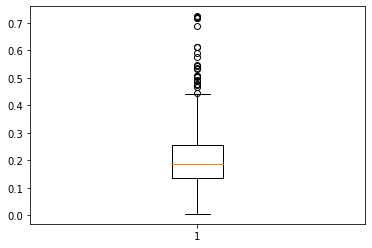

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(TodosErrores1)
plt.show()

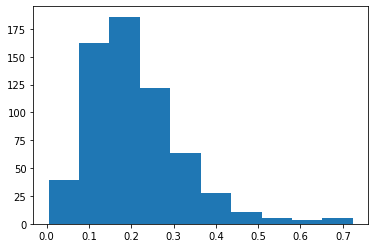

In [ ]:
plt.hist(TodosErrores1)
plt.show()

In [ ]:
Media=np.mean(TodosErrores1)
Mediana=np.median(TodosErrores1)
PrimerCuartil=np.quantile(TodosErrores1,0.25)
SegundoCuartil=np.quantile(TodosErrores1,0.5)
TercerCuartil=np.quantile(TodosErrores1,0.75)
DesvEst=np.std(TodosErrores1)

In [ ]:
print('Media',Media)
print('Mediana',Mediana)
print('Primer Cuartil',PrimerCuartil)
print('Segundo Cuartil',SegundoCuartil)
print('Tercer Cuartil',TercerCuartil)
print('Desv.Est',DesvEst)

Media 0.20829643878185722
Mediana 0.186023982367334
Primer Cuartil 0.13377956635223662
Segundo Cuartil 0.186023982367334
Tercer Cuartil 0.2568689450325185
Desv.Est 0.1135879849584395


In [ ]:
pd.DataFrame(TodosErrores1).to_excel('TodosErrores.xlsx')

In [ ]:
np.average(Error)

nan

In [ ]:
np.average(MatrizDatos)

10.9765722280709

In [ ]:
len(MatrizDatos)

25

In [ ]:
MatrizDatos1[1,2]

6.14012604154037

In [ ]:
for i in range(0,len(MatrizDatos)):
  MatrizDatos=np.delete(MatrizDatos,[i,i])

In [ ]:
MatrizDatos.pop

In [ ]:
MatrizDatos[MatrizDatos!=0]

array([ 0.1626568 ,  4.70246488,  4.27482785,  1.4756768 ,  7.88079337,
        8.24883277, 10.72270701,  2.23452853,  0.39249061, 11.32213769,
        7.24240221,  7.62223912,  5.97573515,  4.23337373,  6.60397487,
        3.69796872,  3.70767378,  5.90469623,  2.23941887,  3.45131264,
        1.72596171,  7.1263052 , 43.39038624,  2.69264745,  0.2296568 ,
        6.14012604,  4.19762547,  0.69703767,  8.2359955 ,  9.38777716,
       11.72960691,  1.06658159,  2.19197672, 13.63999553,  4.52244811,
        6.37953073,  6.56763955,  5.92346296,  6.33749195,  7.56143421,
        5.07732935,  6.90156128,  1.1167869 ,  3.55404496,  3.54247696,
        7.16696919, 44.03935156,  2.62145951,  4.59446488,  6.22012604,
       13.27542059,  6.96829008, 23.19177053, 13.61582129, 16.06204244,
        7.3363667 ,  8.96943905,  8.63897053, 11.87016756, 12.64900547,
       11.02150438,  7.85521187,  9.65676913,  4.19480576, 11.10953784,
        8.64283146,  7.78824258,  8.24508323,  3.34171654, 23.74

In [ ]:
np.delete(MatrizDatos1,[i,i])

matrix([[ 0.        ,  0.1626568 ,  4.70246488,  4.27482785,  1.4756768 ,
          7.88079337,  8.24883277, 10.72270701,  2.23452853,  0.39249061,
         11.32213769,  7.24240221,  7.62223912,  5.97573515,  4.23337373,
          6.60397487,  3.69796872,  3.70767378,  5.90469623,  2.23941887,
          3.45131264,  1.72596171,  7.1263052 , 43.39038624,  0.2296568 ,
          0.        ,  6.14012604,  4.19762547,  0.69703767,  8.2359955 ,
          9.38777716, 11.72960691,  1.06658159,  2.19197672, 13.63999553,
          4.52244811,  6.37953073,  6.56763955,  5.92346296,  6.33749195,
          7.56143421,  5.07732935,  6.90156128,  1.1167869 ,  3.55404496,
          3.54247696,  7.16696919, 44.03935156,  2.62145951,  4.59446488,
          6.22012604,  0.        , 13.27542059,  6.96829008, 23.19177053,
         13.61582129, 16.06204244,  7.3363667 ,  8.96943905,  8.63897053,
         11.87016756, 12.64900547, 11.02150438,  7.85521187,  9.65676913,
          4.19480576, 11.10953784,  8.

In [ ]:
MatrizDatos

array([ 0.1626568 ,  4.27482785,  7.88079337, 10.72270701,  0.39249061,
        7.24240221,  5.97573515,  6.60397487,  3.70767378,  2.23941887,
        1.72596171, 43.39038624,  0.2296568 ,  6.14012604,  0.69703767,
        9.38777716,  1.06658159, 13.63999553,  6.37953073,  5.92346296,
        7.56143421,  6.90156128,  3.55404496,  7.16696919,  2.62145951,
        4.59446488,  6.22012604,  0.        , 13.27542059,  6.96829008,
       23.19177053, 13.61582129, 16.06204244,  7.3363667 ,  8.96943905,
        8.63897053, 11.87016756, 12.64900547, 11.02150438,  7.85521187,
        9.65676913,  4.19480576, 11.10953784,  8.64283146,  7.78824258,
        8.24508323,  3.34171654, 23.74939914, 74.44610325,  9.04975023,
        2.24282785,  1.82862547, 13.92342059,  0.        ,  3.35789897,
        5.41750273, 10.66543772, 15.20929053,  4.78727364,  6.27552472,
       15.9524813 ,  8.65058607, 10.2978069 ,  1.85395121, 10.68793177,
        8.45665495,  3.72415898,  8.72818363,  6.68156802,  5.44

In [ ]:
np.delete(MatrizDatos,MatrizDatos==0)

ValueError: ignored

In [ ]:
MatrizDatos[MatrizDatos==0]

AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Nombre='Log humanitaria Balcik.xlsx'
Escenarios=pd.read_excel(Nombre,sheet_name='Escenarios',index_col=0)
CEDIS=pd.read_excel(Nombre,sheet_name='CEDIS',index_col=0)

In [ ]:
Escenarios['Latitud'].iloc[46]

4.739

In [ ]:
pd.to_numeric(Escenarios['Latitud'])

ValueError: ignored

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [ ]:
n=Escenarios.shape[0]
m=CEDIS.shape[0]
Matriz=np.zeros((n,m))
for i in range(n):
  for j in range(m):
    lat1, lon1, lat2, lon2=Escenarios['Latitud'].iloc[i],Escenarios['Longitud'].iloc[i],CEDIS['Latitud'].iloc[j],CEDIS['Longitud'].iloc[j]
    distancia=haversine(lat1, lon1, lat2, lon2)
    Matriz[i][j]=distancia
Distancias=pd.DataFrame(Matriz,index=Escenarios.index,columns=CEDIS.index)
Distancias.to_excel('DistanciasLogHumanitaria.xlsx')

In [ ]:

Distancias

j,1,2,3,4,5,6,7,8,9,10,11
s,,,,,,,,,,,
1,9.178783,19.867809,5.865947,3.211431,15.131647,12.388112,9.857472,11.467537,9.676174,9.669963,15.607434
2,10.322744,19.335160,7.002723,2.079615,16.117529,12.202503,10.498758,12.314224,10.570430,10.631456,16.680720
3,10.705652,19.566790,7.421743,1.679714,16.233595,12.594725,11.062992,12.325920,10.621893,10.736375,16.889097
4,11.094361,20.347722,7.914318,1.731492,16.068313,13.552643,12.025760,11.990494,10.366193,10.575946,16.895187
5,8.875228,19.942307,5.555767,3.521858,14.921329,12.370314,9.628992,11.314217,9.506890,9.473528,15.357537
...,...,...,...,...,...,...,...,...,...,...,...
95,10.352528,35.620624,12.894524,19.813736,2.094489,26.962525,19.457709,6.717100,7.873993,7.552883,2.824320
96,10.384356,35.304503,12.603482,18.961298,1.445190,26.744040,19.530796,5.509674,6.894531,6.745041,3.715563
97,9.334180,34.051071,11.385571,17.626962,0.758323,25.528696,18.457804,4.246725,5.564528,5.414703,3.633315


In [ ]:
Escenarios.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', name='s')

In [ ]:
round(Distancias,4).to_csv('DistanciasLogHumanitaria.csv')

###PLANEACIÓN DE INSTALACIONES###

In [34]:
NombreDocumento='perros planeacion.xlsx'
Ubicacion=pd.read_excel(NombreDocumento,sheet_name='Hoja1',index_col=0)

#Ubicacion.dropna(inplace=True)

In [35]:
Ubicacion=Ubicacion.dropna().set_axis(Ubicacion.iloc[1],axis=1).drop(['Etiquetas de fila'],axis=0)

In [46]:
Ubicacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Bogotá D.C to Vaupés
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Suma de Total población perros y gatos  33 non-null     object
 1   Latitud                                 33 non-null     object
 2   Longitud                                33 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [50]:
Ubicacion=Ubicacion.astype('float')

In [27]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [59]:
n=Ubicacion.shape[0]
Matriz=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    lat1, lon1, lat2, lon2=Ubicacion['Latitud'].iloc[i],Ubicacion['Longitud'].iloc[i],Ubicacion['Latitud'].iloc[j],Ubicacion['Longitud'].iloc[j]
    LineaRecta=haversine(lat1, lon1, lat2, lon2)
    Matriz[i][j]=LineaRecta
LineaRecta=pd.DataFrame(Matriz,index=Ubicacion.index,columns=Ubicacion.index)
#Distancias.to_csv('Distancias.csv')

In [61]:
LineaRecta.to_excel('Distancias',sheet_name='Distancias')